In [1]:
import tensorflow as tf
from tensorflow import keras as ks
import pandas as pd
import numpy as np
import matplotlib.style as stl
stl.use("ggplot")
import seaborn as sns
import os
from tqdm import tqdm
import cv2
from os import listdir
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator


In [2]:
def list_files(directory, contains):
    return list(f for f in listdir(directory) if contains in f)

In [3]:
directory = "../input/opencv-facial-recognition-lbph/yalefaces/"

In [4]:
directory_train='../input/opencv-facial-recognition-lbph/yalefaces/train/'

filenames = pd.DataFrame(list_files(directory_train, "subject"))

data = filenames[0].str.split(".", expand=True)
data["filename"] = filenames

data = data.rename(columns = {0:"subject", 1:"category"})
data['subject'] = data.subject.str.replace('subject' , '')
data.apply(pd.to_numeric, errors='coerce').dropna()
data['subject'] = pd.to_numeric(data["subject"])
data['path']= directory_train + data["filename"]

In [5]:
data.head()

,subject,category,2,filename,path
0,15,happy,gif,subject15.happy.gif,../input/opencv-facial-recognition-lbph/yalefa...
1,13,noglasses,gif,subject13.noglasses.gif,../input/opencv-facial-recognition-lbph/yalefa...
2,1,normal,gif,subject01.normal.gif,../input/opencv-facial-recognition-lbph/yalefa...
3,15,surprised,gif,subject15.surprised.gif,../input/opencv-facial-recognition-lbph/yalefa...
4,14,wink,gif,subject14.wink.gif,../input/opencv-facial-recognition-lbph/yalefa...


In [6]:
directory_test='../input/opencv-facial-recognition-lbph/yalefaces/test/'
filenames = pd.DataFrame(list_files(directory_test, "subject"))

datatest = filenames[0].str.split(".", expand=True)
datatest["filename"] = filenames

datatest = datatest.rename(columns = {0:"subject", 1:"category"})
datatest['subject'] = datatest.subject.str.replace('subject' , '')
datatest.apply(pd.to_numeric, errors='coerce').dropna()
datatest['subject'] = pd.to_numeric(datatest["subject"])
datatest['path']= directory_test + data["filename"]

In [7]:
datatest.head()

,subject,category,2,filename,path
0,3,glasses,gif,subject03.glasses.gif,../input/opencv-facial-recognition-lbph/yalefa...
1,12,normal,gif,subject12.normal.gif,../input/opencv-facial-recognition-lbph/yalefa...
2,2,leftlight,gif,subject02.leftlight.gif,../input/opencv-facial-recognition-lbph/yalefa...
3,13,sad,gif,subject13.sad.gif,../input/opencv-facial-recognition-lbph/yalefa...
4,6,leftlight,gif,subject06.leftlight.gif,../input/opencv-facial-recognition-lbph/yalefa...


In [8]:
data.head()

,subject,category,2,filename,path
0,15,happy,gif,subject15.happy.gif,../input/opencv-facial-recognition-lbph/yalefa...
1,13,noglasses,gif,subject13.noglasses.gif,../input/opencv-facial-recognition-lbph/yalefa...
2,1,normal,gif,subject01.normal.gif,../input/opencv-facial-recognition-lbph/yalefa...
3,15,surprised,gif,subject15.surprised.gif,../input/opencv-facial-recognition-lbph/yalefa...
4,14,wink,gif,subject14.wink.gif,../input/opencv-facial-recognition-lbph/yalefa...


In [9]:
data=data.drop(2, axis=1)


In [10]:
datatest=datatest.drop(2, axis=1)

In [11]:
data["category"].unique()

array(['happy', 'noglasses', 'normal', 'surprised', 'wink', 'sleepy',
       'glasses', 'sad', 'rightlight', 'leftlight', 'centerlight'],
      dtype=object)

In [12]:
data["subject"].unique()

array([15, 13,  1, 14, 11,  6, 12,  2,  3, 10,  8,  7,  5,  9,  4])

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

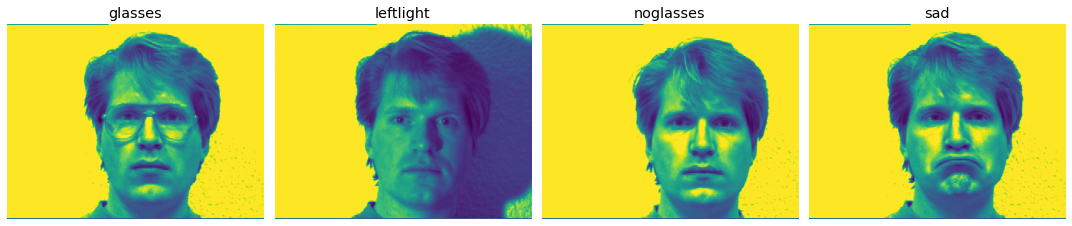

In [14]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 10))
ax = [ax1, ax2, ax3, ax4]
img1 = plt.imread("../input/opencv-facial-recognition-lbph/yalefaces/train/subject01.glasses.gif")
img2 = plt.imread("../input/opencv-facial-recognition-lbph/yalefaces/train/subject01.leftlight.gif")
img3 = plt.imread("../input/opencv-facial-recognition-lbph/yalefaces/train/subject01.noglasses.gif")
img4 = plt.imread("../input/opencv-facial-recognition-lbph/yalefaces/train/subject01.sad.gif")
ax[0].imshow(img1)
ax[0].set_title("glasses")
ax[0].axis('off')
ax[1].imshow(img2)
ax[1].set_title("leftlight")
ax[1].axis('off')
ax[2].imshow(img3)
ax[2].set_title("noglasses")
ax[2].axis('off')
ax[3].imshow(img4)
ax[3].set_title("sad")
ax[3].axis('off')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of images')

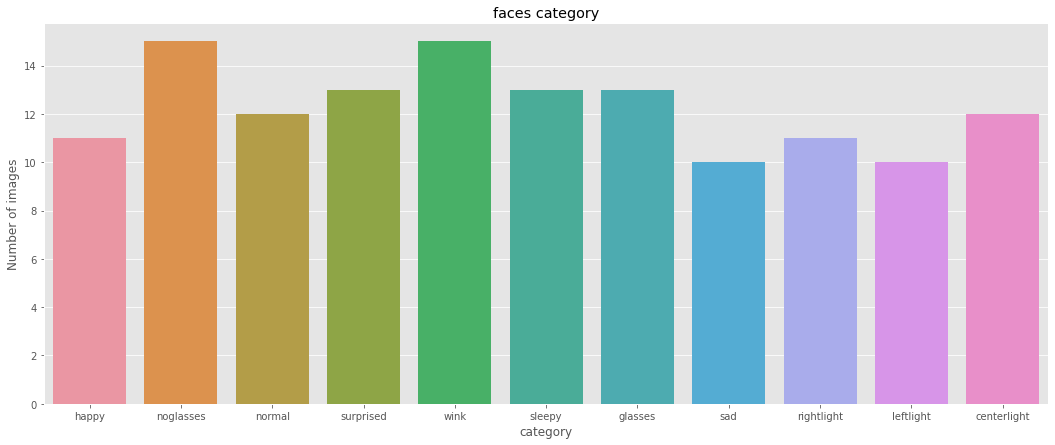

In [15]:
plt.figure(figsize= (18,7))
sns.countplot(x=data.category)
plt.title('faces category')
plt.ylabel('Number of images')



In [16]:
data.head()

,subject,category,filename,path
0,15,happy,subject15.happy.gif,../input/opencv-facial-recognition-lbph/yalefa...
1,13,noglasses,subject13.noglasses.gif,../input/opencv-facial-recognition-lbph/yalefa...
2,1,normal,subject01.normal.gif,../input/opencv-facial-recognition-lbph/yalefa...
3,15,surprised,subject15.surprised.gif,../input/opencv-facial-recognition-lbph/yalefa...
4,14,wink,subject14.wink.gif,../input/opencv-facial-recognition-lbph/yalefa...


In [17]:
datatest.head()

,subject,category,filename,path
0,3,glasses,subject03.glasses.gif,../input/opencv-facial-recognition-lbph/yalefa...
1,12,normal,subject12.normal.gif,../input/opencv-facial-recognition-lbph/yalefa...
2,2,leftlight,subject02.leftlight.gif,../input/opencv-facial-recognition-lbph/yalefa...
3,13,sad,subject13.sad.gif,../input/opencv-facial-recognition-lbph/yalefa...
4,6,leftlight,subject06.leftlight.gif,../input/opencv-facial-recognition-lbph/yalefa...


In [18]:
train_datagenerator = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1)

In [19]:
train_generator = train_datagenerator.flow_from_dataframe(
    data, 
    x_col='path', 
    y_col='subject',
     
    color_mode='rgba', 
    class_mode=None, 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training')
validation_generator = train_datagenerator.flow_from_dataframe(
    datatest , 
    x_col='path',
    y_col='subject',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode=None, 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation')

Found 0 validated image filenames.
Found 0 validated image filenames.


In [20]:
import os

In [21]:
cd /kaggle/input/ 

/kaggle/input


In [22]:
ls


opencv-facial-recognition-lbph/


In [23]:
os.mkdir('/kaggle/working/glasses/')

In [24]:
os.mkdir('/kaggle/working/surprised/')
os.mkdir('/kaggle/working/leftlight/')
os.mkdir('/kaggle/working/noglasses/')
os.mkdir('/kaggle/working/normal/')
os.mkdir('/kaggle/working/rightlight/')
os.mkdir('/kaggle/working/sleepy/')
os.mkdir('/kaggle/working/wink/')
os.mkdir('/kaggle/working/sad/')

In [25]:
cd /kaggle/working/

/kaggle/working


In [26]:
ls

__notebook__.ipynb  leftlight/  normal/      sad/     surprised/
glasses/            noglasses/  rightlight/  sleepy/  wink/


In [27]:
imagname = os.listdir("../input/opencv-facial-recognition-lbph/yalefaces/train")
import shutil 
train_images = '../input/opencv-facial-recognition-lbph/yalefaces/train'
labels =["leftlight", "rightlight"]
for k in labels:
    os.makedirs(os.path.join('./leftlight',k))
for i in list(imagname):
        get_image = os.path.join('../input/opencv-facial-recognition-lbph/yalefaces/train', i) # Path to Images
        for j in data.category:
            I=i.split(".")[1]
            if (j==I):
                    move_image_to_cat = shutil.copy (get_image,  I+".gif")
            else :
                    move_image_to_cat = shutil.copy (get_image,  I+".gif")

In [28]:
# ../input/opencv-facial-recognition-lbph/yalefaces/train/subject01.glasses.gif
# imagname = os.listdir("../input/opencv-facial-recognition-lbph/yalefaces/train")
# import shutil 
# train_images = '../input/opencv-facial-recognition-lbph/yalefaces/train'
# labels =["leftlight", 'normal', 'sad', 'surprised', 'glasses','noglasses','rightlight','sleepy','wink']
# for i in labels:
#     os.makedirs(os.path.join('train_images',i))
# for i in list(imagname):
#         get_image = os.path.join('train_df', i) # Path to Images
#         for j in train_df.Image_ID:
#             if (j==i):
#                 if (train_df[j]["Label"]==0 ) :
#                     move_image_to_cat = shutil.copy (get_image, 'train_images/'+"no_pathole")
#                 else :
#                     move_image_to_cat = shutil.copy (get_image, 'train_images/'+"pathole")